In [1]:
import finesse.virgo

finesse.init_plotting()

In [2]:
virgo = finesse.virgo.Virgo()

In [3]:
virgo.sensing_matrix

<SensingMatrixSolution of series/sensing_matrix_dc @ 0x7f099b4d6f40 children=0>

In [4]:
virgo.print_sensing_matrix()

┌──────╥──────────┬──────────┬──────────┬──────────┬──────────┬─────────┬──────────┬──────────┐
│      ║  B2_8_I  │  B2_8_Q  │ B2_56_I  │ B2_56_Q  │  B2_6_I  │ B2_6_Q  │ B1p_56_I │ B1p_56_Q │
╞══════╬══════════╪══════════╪══════════╪══════════╪══════════╪═════════╪══════════╪══════════╡
│ PRCL ║    0.016 │ -0.00094 │    0.019 │   -0.012 │  -0.0018 │ 0.00048 │    0.016 │    0.021 │
├──────╫──────────┼──────────┼──────────┼──────────┼──────────┼─────────┼──────────┼──────────┤
│ MICH ║  8.4E-05 │ -4.9E-06 │ -7.8E-05 │ -0.00031 │ -0.00054 │ -0.0032 │      1.6 │      2.3 │
├──────╫──────────┼──────────┼──────────┼──────────┼──────────┼─────────┼──────────┼──────────┤
│ CARM ║     -4.4 │     0.27 │     -5.2 │      3.4 │      4.7 │   -0.78 │     -7.3 │     -9.9 │
├──────╫──────────┼──────────┼──────────┼──────────┼──────────┼─────────┼──────────┼──────────┤
│ DARM ║    0.029 │  -0.0018 │    0.032 │   -0.021 │   -0.029 │  0.0058 │  4.5E+02 │  6.6E+02 │
├──────╫──────────┼──────────┼──────────

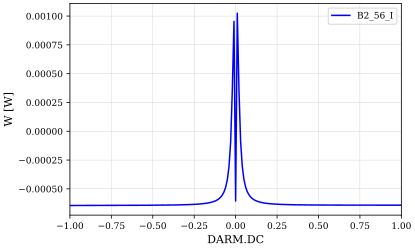

<ArraySolution of series/xaxis @ 0x7ff2f5d8f1c0 children=0>

In [10]:
virgo.dof_plot("DARM", "B2_56_I", logy=False)

In [12]:
virgo.pretune()

virgo.print_tunings()

virgo.optimize_lock_gains(verbose=True)
virgo.print_locks()

┌───────────┬────────────┬──────────────┬──────────────┬──────────────┐
│ Optic/DOF │  phi [deg] │ dof.DC [deg] │ Tuning [deg] │  Tuning [pm] │
╞═══════════╪════════════╪══════════════╪══════════════╪══════════════╡
│ NE        │          0 │              │       0.0369 │       109.06 │
│ WE        │          0 │              │      -0.0369 │      -109.06 │
│ NI        │          0 │              │       0.0369 │       109.06 │
│ WI        │          0 │              │      -0.0369 │      -109.06 │
│ PR        │          0 │              │       0.0499 │      147.482 │
│ SR        │          0 │              │       87.522 │       258676 │
│ PRCL      │            │       0.0499 │              │              │
│ MICH      │            │      -0.0369 │              │              │
│ CARM      │            │            0 │              │              │
│ DARM      │            │            0 │              │              │
│ SRCL      │            │       -87.52 │              │        

In [4]:
virgo.get_tuning('DARM')

3.0

In [5]:
virgo.set_tunings({
    "NE": 1,
    "WE": 1,
    "NI": 1,
    "WI": 1,
    "PR": 1,
    "SR": 1,
})

virgo.print_tunings()

┌───────────┬────────────┬────────────┬──────────────┬──────────────┐
│ Optic/DOF │  phi [deg] │   DC [deg] │ Tuning [deg] │  Tuning [pm] │
╞═══════════╪════════════╪════════════╪══════════════╪══════════════╡
│ NE        │          1 │            │            1 │      2955.56 │
│ WE        │          1 │            │            1 │      2955.56 │
│ NI        │          1 │            │            1 │      2955.56 │
│ WI        │          1 │            │            1 │      2955.56 │
│ PR        │          1 │            │            1 │      2955.56 │
│ SR        │          1 │            │            1 │      2955.56 │
│ DARM      │            │          0 │            0 │            0 │
│ CARM      │            │          0 │            2 │      5911.11 │
│ MICH      │            │          0 │            0 │            0 │
│ PRCL      │            │          0 │            1 │      2955.56 │
│ SRCL      │            │          0 │           -1 │     -2955.56 │
└───────────┴───────

In [6]:
print(type(virgo.model.DARM))

<class 'finesse.components.dof.DegreeOfFreedom'>


In [7]:
virgo.print_locks()

virgo.pretune()
virgo.optimize_lock_gains()
virgo.print_locks()

virgo.print_tunings()

 ╔═══════════════════════════════════════════════════════╗
 ║ Parameters for locks:                                 ║
 ╠═══════════════════════════════════════════════════════╣
 ║ Lock name      port     DOF      lock gain   disabled ║
 ║ PRCL_lock      B2_8_I   PRCL.DC        1.0      False ║
 ║ MICH_lock      B2_56_Q  MICH.DC        1.0      False ║
 ║ CARM_lock      B2_6_I   CARM.DC        1.0      False ║
 ║ DARM_rf_lock   B1p_56_I DARM.DC        1.0      False ║
 ║ DARM_dc_lock   B1_DC    DARM.DC        1.0       True ║
 ║ SRCL_lock      B2_56_I  SRCL.DC        1.0      False ║
 ╟───────────────────────────────────────────────────────╢
 ║ Accuracies        [deg]            [m]            [W] ║
 ║ PRCL     :  0.000338346          1e-12        5.3e-06 ║
 ║ MICH     :   0.00338346          1e-11          1e-06 ║
 ║ CARM     :  3.38346e-06          1e-14        1.6e-05 ║
 ║ DARM     :  3.38346e-06          1e-14         0.0015 ║
 ║ SRCL     :     0.169173          5e-10        2.2e-05

In [8]:
model = finesse.Model()

model.parse("""
l l1
m m1
m m2
link(l1, m1, m2)

pd refl m1.p1.o
readout_rf refl_ro m1.p1.o f=0 output_detectors=true

dof test m1.dofs.z +1
""")

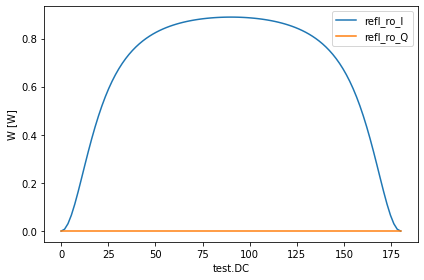

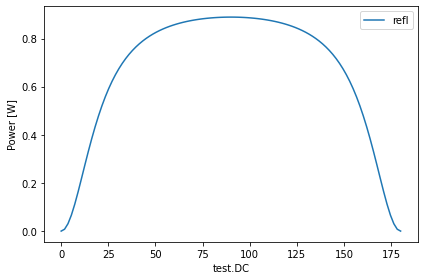

{finesse.detectors.powerdetector.PowerDetectorDemod1: <Figure size 432x288 with 1 Axes>,
 'refl_ro_I': <Figure size 432x288 with 1 Axes>,
 'refl_ro_Q': <Figure size 432x288 with 1 Axes>,
 finesse.detectors.powerdetector.PowerDetector: <Figure size 432x288 with 1 Axes>,
 'refl': <Figure size 432x288 with 1 Axes>}

In [9]:
from finesse.analysis.actions import Xaxis
out = model.run(Xaxis(model.test.DC, 'lin', 0, 180, 100))

out.plot()